In [2]:
from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker  # for testing use only
import matplotcheck.base as mpc     # for testing use only
import matplotcheck.notebook as nb  # for testing use only
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
import requests
import bs4
import re
import time
from bs4 import BeautifulSoup
# Standard Improts
import os
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import mean_squared_error, median_absolute_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [3]:
file_path = r'C:\Users\Administrator\project\data\anime_end.csv'
data = pd.read_csv(file_path, encoding='latin1')
data = data.rename(columns={'FAvorites': 'Favorites'})

In [4]:
def extract_id(url):
    if isinstance(url, str):
        match = re.search(r'\d+', url)
        if match:
            return match.group(0)
    return np.nan

data['ID'] = data['Url'].apply(extract_id)
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df.head())

   Unnamed: 0                                        Name Episodes  Rank  \
0           0            Fullmetal Alchemist: Brotherhood       64     1   
1           1                   Bleach: Sennen Kessen-hen       13     2   
2           2                                 Steins;Gate       24     3   
3           3                                   GintamaÂ°       51     4   
4           4  Kaguya-sama wa Kokurasetai: Ultra Romantic       13     5   

   Score  Members  Favorites  Score_user  \
0   9.10  3175783   217573.0   2019566.0   
1   9.07   444548    17984.0    213506.0   
2   9.07  2439813   182939.0   1335932.0   
3   9.06   595373    15947.0    237924.0   
4   9.05   819904    29110.0    450963.0   

                                              Genres      Studio  \
0  Action, Adventure, Drama, Fantasy, Military, S...       Bones   
1                Action, Adventure, Fantasy, Shounen     Pierrot   
2  Drama, Sci-Fi, Suspense, Psychological, Time T...   White Fox   
3   Ac

In [5]:
columns = list(data.columns)
columns.remove('ID')  # Remove 'ID' from the list of columns
columns.insert(columns.index('Name') + 1, 'ID')  # Insert 'ID' after 'Name'
data = data[columns]  # Reorder the columns in the DataFrame

In [6]:
data['Name_Length'] = data['Name'].apply(lambda x: len(x))


In [7]:
columns = list(data.columns)
columns.remove('Name_Length')  # Remove 'ID' from the list of columns
columns.insert(columns.index('ID') + 1, 'Name_Length')  # Insert 'ID' after 'Name'
data = data[columns]  # Reorder the columns in the DataFrame

In [8]:
data['Score_user'] = pd.to_numeric(data['Score_user'], errors='coerce')
data['Favorites'] = pd.to_numeric(data['Favorites'], errors='coerce')
data["Episodes"] = pd.to_numeric(data["Episodes"], errors="coerce")
data["ID"] = pd.to_numeric(data["ID"], errors="coerce")
data["Name_Length"] = pd.to_numeric(data["Name_Length"], errors="coerce")
data["Rank"] = pd.to_numeric(data["Name_Length"], errors="coerce")
del data['Url']
# Check for missing values
print(data.isnull().sum())


Unnamed: 0        0
Name              0
ID                1
Name_Length       0
Episodes         51
Rank              0
Score             1
Members           0
Favorites      4342
Score_user     4211
Genres         2848
Studio         2992
Duration       4342
Rating         4342
Type           4343
Start Date     7498
End Date       7498
Status         4343
dtype: int64


In [9]:
# Data preprocessing
data.dropna(subset=['Episodes'], inplace=True)  # Remove rows with missing values
data.dropna(subset=['Studio'], inplace=True)  # Remove rows with missing values
data.dropna(subset=['Genres'], inplace=True)  # Remove rows with missing values


In [10]:
print(data.isnull().sum())

Unnamed: 0        0
Name              0
ID                0
Name_Length       0
Episodes          0
Rank              0
Score             0
Members           0
Favorites      1468
Score_user     1340
Genres            0
Studio            0
Duration       1468
Rating         1468
Type           1469
Start Date     4580
End Date       4580
Status         1469
dtype: int64


In [11]:
data = data[data['Episodes'] != 'Unknown'].dropna(subset=['Episodes'])

In [12]:
print(data.isnull().sum())

Unnamed: 0        0
Name              0
ID                0
Name_Length       0
Episodes          0
Rank              0
Score             0
Members           0
Favorites      1468
Score_user     1340
Genres            0
Studio            0
Duration       1468
Rating         1468
Type           1469
Start Date     4580
End Date       4580
Status         1469
dtype: int64


In [13]:
data['Start Date'].fillna('Unknown', inplace=True)
data['End Date'].fillna('Unknown', inplace=True)


In [14]:
print(data.isnull().sum())

Unnamed: 0        0
Name              0
ID                0
Name_Length       0
Episodes          0
Rank              0
Score             0
Members           0
Favorites      1468
Score_user     1340
Genres            0
Studio            0
Duration       1468
Rating         1468
Type           1469
Start Date        0
End Date          0
Status         1469
dtype: int64


In [15]:
data['Status'].fillna('Finished Airing', inplace=True)


In [16]:
data=data.dropna()

In [17]:
print(data.isnull().sum())

Unnamed: 0     0
Name           0
ID             0
Name_Length    0
Episodes       0
Rank           0
Score          0
Members        0
Favorites      0
Score_user     0
Genres         0
Studio         0
Duration       0
Rating         0
Type           0
Start Date     0
End Date       0
Status         0
dtype: int64


In [18]:
def convert_duration(duration):
    minutes = 0
    hours = 0

    # Check if the duration contains minutes
    minutes_match = re.search(r'(\d+)\s*min', duration)
    if minutes_match:
        minutes = int(minutes_match.group(1))

    # Check if the duration contains hours
    hours_match = re.search(r'(\d+)\s*hr', duration)
    if hours_match:
        hours = int(hours_match.group(1))

    # Convert hours and minutes to seconds
    total_seconds = (hours * 60 * 60) + (minutes * 60)
    return total_seconds

data['Duration'] = data['Duration'].astype(str).apply(convert_duration)

In [19]:
def extract_rating_number(rating):
    match = re.search(r'\d+', rating)
    if match:
        return int(match.group())
    return None

# Apply the extract_rating_number function to the 'Rating' column
data['Rating'] = data['Rating'].astype(str).apply(extract_rating_number)

In [20]:
data['Rating'].fillna(0, inplace=True)

In [21]:
new_data = data.copy()

In [22]:
def get_frequent_elements(df, col_name, num_top_elements):
    ###
    df_c = df.copy()
    return df_c[col_name].value_counts(ascending=False)[:num_top_elements].sort_index()
    ###

In [23]:
def get_frequenft_elements(df, col_name, num_top_elements):
    return df[col_name].value_counts(ascending=True)[:num_top_elements].sort_index()

In [24]:
sr_freq_studio = get_frequent_elements(new_data, 'Studio', 11)

In [25]:
sr_freq_studio

A-1 Pictures         217
J.C.Staff            299
Madhouse             308
OLM                  180
Pierrot              203
Production I.G       281
Studio Deen          232
Sunrise              413
TMS Entertainment    235
Toei Animation       486
add some             303
Name: Studio, dtype: int64

In [26]:
new_data['Genres'] = new_data['Genres'].str.split(',')

In [27]:

# Split the genres into individual categories
genres = data['Genres'].str.get_dummies(',')

genres

,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,Comedy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Strategy Game,Super Power,Supernatural,Suspense,Video Game
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Create a new DataFrame with binary values for genres
new_data_geners = pd.concat([data[['Name']], genres], axis=1)

# Print the updated DataFrame
print(new_data_geners.head())
new_data_geners

                                         Name   Adult Cast   Adventure  \
0            Fullmetal Alchemist: Brotherhood            0           1   
1                   Bleach: Sennen Kessen-hen            0           1   
2                                 Steins;Gate            0           0   
3                                   GintamaÂ°            0           0   
4  Kaguya-sama wa Kokurasetai: Ultra Romantic            0           0   

    Anthropomorphic   Avant Garde   Award Winning   Boys Love   CGDCT  \
0                 0             0               0           0       0   
1                 0             0               0           0       0   
2                 0             0               0           0       0   
3                 0             0               0           0       0   
4                 0             0               0           0       0   

    Childcare   Combat Sports  ...  Shoujo  Shounen  Slice of Life  Space  \
0           0               0  ...     

,Name,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,...,Shoujo,Shounen,Slice of Life,Space,Sports,Strategy Game,Super Power,Supernatural,Suspense,Video Game
0,Fullmetal Alchemist: Brotherhood,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bleach: Sennen Kessen-hen,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Steins;Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GintamaÂ°,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,Oniichan no Koto nanka Zenzen Suki ja Nai n da...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,Play Ball 2nd,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,Queen's Blade Rebellion vs. Hagure Yuusha no A...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8485,Rakka-sei,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
new_data_geners.columns[0]

'Name'

In [30]:
del new_data_geners['Name'] 

In [31]:
new_data_geners.columns = new_data_geners.columns.str.replace(' ', '')

In [32]:
new_data_geners = new_data_geners.groupby(new_data_geners.columns, axis=1).sum()

In [33]:
new_data_geners = new_data_geners.loc[:, ~new_data_geners.columns.duplicated()]

In [34]:
new_data_geners

,Action,AdultCast,Adventure,Anthropomorphic,AvantGarde,AwardWinning,BoysLove,CGDCT,Childcare,CombatSports,...,SuperPower,Supernatural,Survival,Suspense,TeamSports,TimeTravel,Vampire,VideoGame,VisualArts,Workplace
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_genre_scores = pd.concat([data['Score'], new_data_geners], axis=1).dropna()


In [36]:
f, p = f_regression(df_genre_scores[new_data_geners.columns], df_genre_scores['Score'])

pd.DataFrame({
    'Feature':new_data_geners.columns,
    'F-Score':f,
}).sort_values('F-Score', ascending=False).style.bar(subset=['F-Score'], color='grey')

,Feature,F-Score
58,Shounen,370.719575
5,AwardWinning,343.511422
14,Drama,291.926351
29,Iyashikei,213.564494
1,AdultCast,188.674254
67,Suspense,178.635686
18,GagHumor,149.122050
31,Kids,139.827987
65,Supernatural,138.104025
15,Ecchi,136.423581


In [37]:
top_genres = ['Shounen', 'Drama', 'Ecchi', 'Suspense', 'Comedy', 'Supernatural', 'Mystery', 'LovePolygon', 'RomanticSubtext', 'Action', 'MartialArts', 'TimeTravel','AwardWinning']
new_top_genres = ['Shounen', 'Drama', 'Ecchi', 'Suspense', 'Comedy', 'Supernatural', 'Mystery', 'LovePolygon', 'RomanticSubtext', 'Action', 'MartialArts', 'TimeTravel','AwardWinning','other_genres']


In [38]:
new_data_geners['other_genres'] = (new_data_geners.drop(top_genres, axis=1) == 1).any(axis=1).astype(int)

In [39]:
data_geners = new_data_geners.filter(items=new_top_genres)

In [40]:
data_geners

,Shounen,Drama,Ecchi,Suspense,Comedy,Supernatural,Mystery,LovePolygon,RomanticSubtext,Action,MartialArts,TimeTravel,AwardWinning,other_genres
0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,0,1,0,1
3,1,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0,0,1,0,1,0,0,0,0,0,0,0,0,1
8483,0,1,0,0,0,0,0,0,0,1,0,0,0,1
8484,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8485,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
studio_df = pd.get_dummies(data['Studio'])

# Rename the columns by prefixing 'studio_' to each studio name
studio_df.columns = [ col for col in studio_df.columns]



In [42]:
top_studio_names = ['A-1 Pictures', 'Bones', 'J.C.Staff', 'Madhouse', 'Pierrot', 'Production I.G', 'Studio Deen', 'Sunrise', 'TMS Entertainment', 'Toei Animation', 'add some']
new_top_studio_names = ['A-1 Pictures', 'Bones', 'J.C.Staff', 'Madhouse', 'Pierrot', 'Production I.G', 'Studio Deen', 'Sunrise', 'TMS Entertainment', 'Toei Animation', 'add some','other_studio']


In [43]:
studio_df['other_studio'] = (studio_df.drop(top_studio_names, axis=1) == 1).any(axis=1).astype(int)

In [44]:
studio_df

,10Gauge,2:10 AM Animation,7doc,8bit,A-1 Pictures,A.C.G.T.,AIC,AIC ASTA,AIC Build,AIC Classic,...,dwarf,feel.,helo.inc,iDRAGONS Creative Studio,ixtl,monofilmo,production doA,studio MOTHER,ufotable,other_studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
new_studio_df = studio_df.filter(items=new_top_studio_names)

In [173]:
new_studio_df

,A-1 Pictures,Bones,J.C.Staff,Madhouse,Pierrot,Production I.G,Studio Deen,Sunrise,TMS Entertainment,Toei Animation,add some,other_studio
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0,0,0,0,0,0,0,0,0,0,0,1
8483,0,0,0,0,0,0,0,0,0,0,1,0
8484,0,0,0,0,0,0,0,0,0,0,0,1
8485,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
new_data_Type= data['Type'].str.get_dummies(',')

In [47]:
new_data_Type 

,Movie,ONA,OVA,Special,TV
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
8482,0,0,0,0,1
8483,0,0,0,0,1
8484,0,0,0,1,0
8485,0,1,0,0,0


In [79]:
eda_df = pd.concat([data,data_geners, new_studio_df,new_data_Type], axis=1)

In [80]:
del eda_df['Unnamed: 0']
del eda_df['Genres']


In [82]:
eda_df['Start Date'] = eda_df['Start Date'].str.extract(r'(\d{4})')


In [83]:
eda_df['End Date'] = eda_df['End Date'].str.extract(r'(\d{4})')


<Figure size 800x600 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

Text(0.5, 1.0, 'Average Score by Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Average Score')

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '13.0'), Text(2, 0, '17.0')])

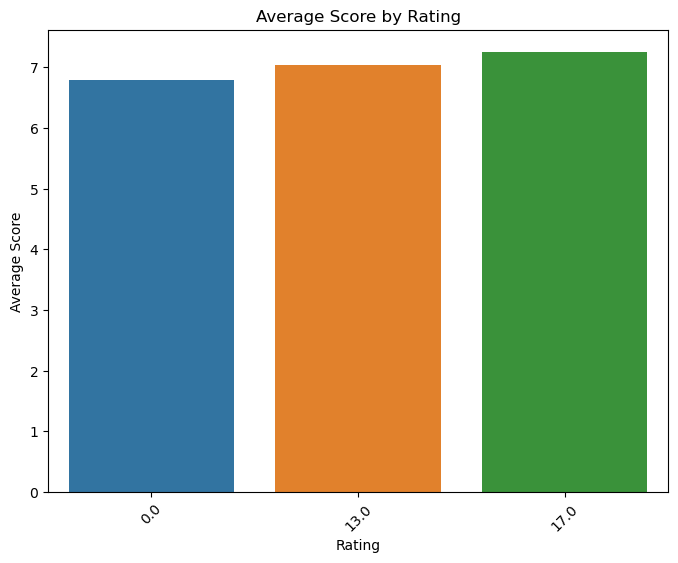

In [84]:
score_avg_by_rating = eda_df.groupby('Rating')['Score'].mean()

# Step 2: Create Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=score_avg_by_rating.index, y=score_avg_by_rating.values)
plt.title('Average Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

In [85]:
eda_df.columns

Index(['Name', 'ID', 'Name_Length', 'Episodes', 'Rank', 'Score', 'Members',
       'Favorites', 'Score_user', 'Studio', 'Duration', 'Rating', 'Type',
       'Start Date', 'End Date', 'Status', 'Shounen', 'Drama', 'Ecchi',
       'Suspense', 'Comedy', 'Supernatural', 'Mystery', 'LovePolygon',
       'RomanticSubtext', 'Action', 'MartialArts', 'TimeTravel',
       'AwardWinning', 'other_genres', 'A-1 Pictures', 'Bones', 'J.C.Staff',
       'Madhouse', 'Pierrot', 'Production I.G', 'Studio Deen', 'Sunrise',
       'TMS Entertainment', 'Toei Animation', 'add some', 'other_studio',
       'Movie', 'ONA', 'OVA', 'Special', 'TV'],
      dtype='object')

<AxesSubplot:xlabel='Score', ylabel='Count'>

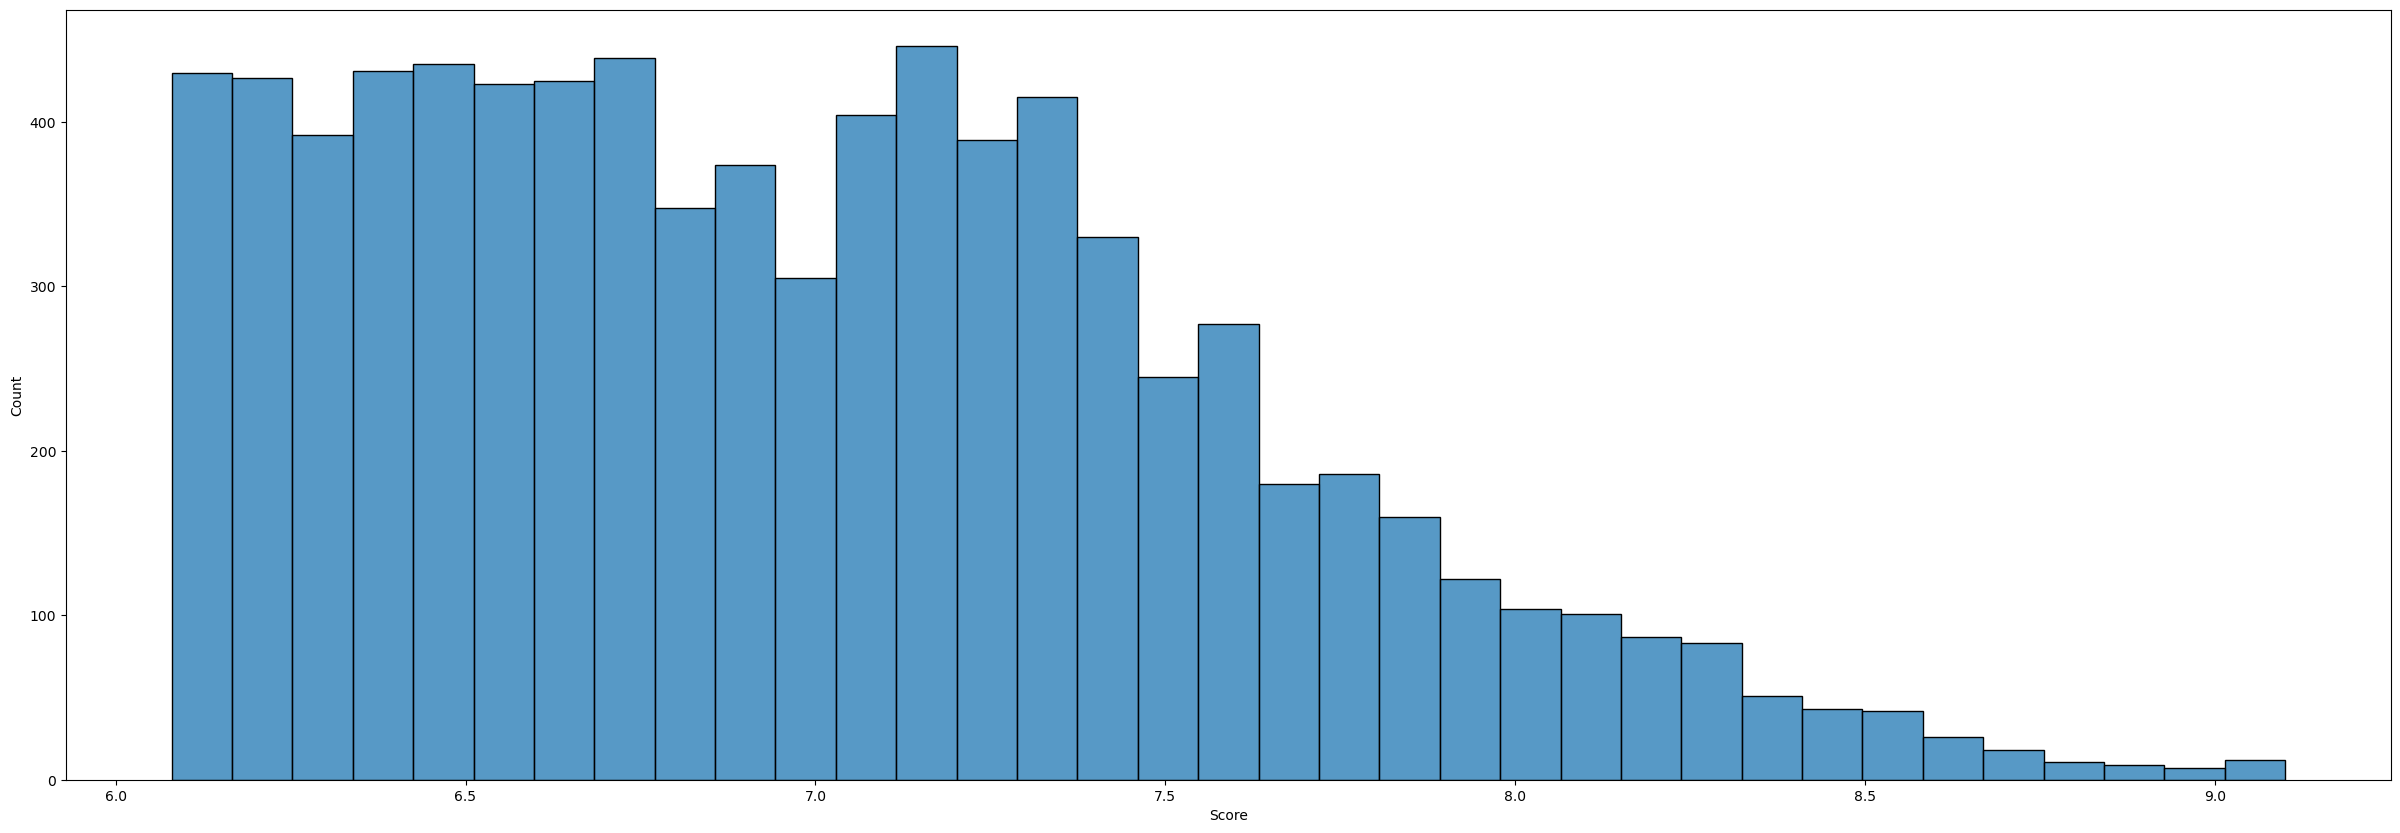

In [86]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.subplot.wspace'] = 0.7
plt.rcParams['figure.subplot.hspace'] = 0.7
sns.histplot(data=eda_df, x='Score')

In [87]:
numeric_columns = ['Episodes', 'Rank', 'Score', 'Members', 'Favorites',
       'Score_user']

# Compute summary statistics
summary_stats = eda_df[numeric_columns].describe()

# Print the summary statistics
print(summary_stats)

          Episodes         Rank        Score       Members      Favorites  \
count  8177.000000  8177.000000  8177.000000  8.177000e+03    8177.000000   
mean     15.267947    28.549346     6.998130  1.027807e+05    1210.212792   
std      37.878720    16.529241     0.607986  2.523495e+05    6849.822478   
min       1.000000     1.000000     6.080000  2.370000e+02       0.000000   
25%       1.000000    16.000000     6.500000  4.711000e+03       6.000000   
50%      10.000000    25.000000     6.940000  1.879000e+04      33.000000   
75%      13.000000    37.000000     7.390000  8.127200e+04     251.000000   
max    1787.000000   124.000000     9.100000  3.712291e+06  217573.000000   

         Score_user  
count  8.177000e+03  
mean   5.325141e+04  
std    1.527516e+05  
min    1.030000e+02  
25%    1.573000e+03  
50%    7.281000e+03  
75%    3.521000e+04  
max    2.618901e+06  


<AxesSubplot:xlabel='Score', ylabel='Density'>

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Distribution of Scores')

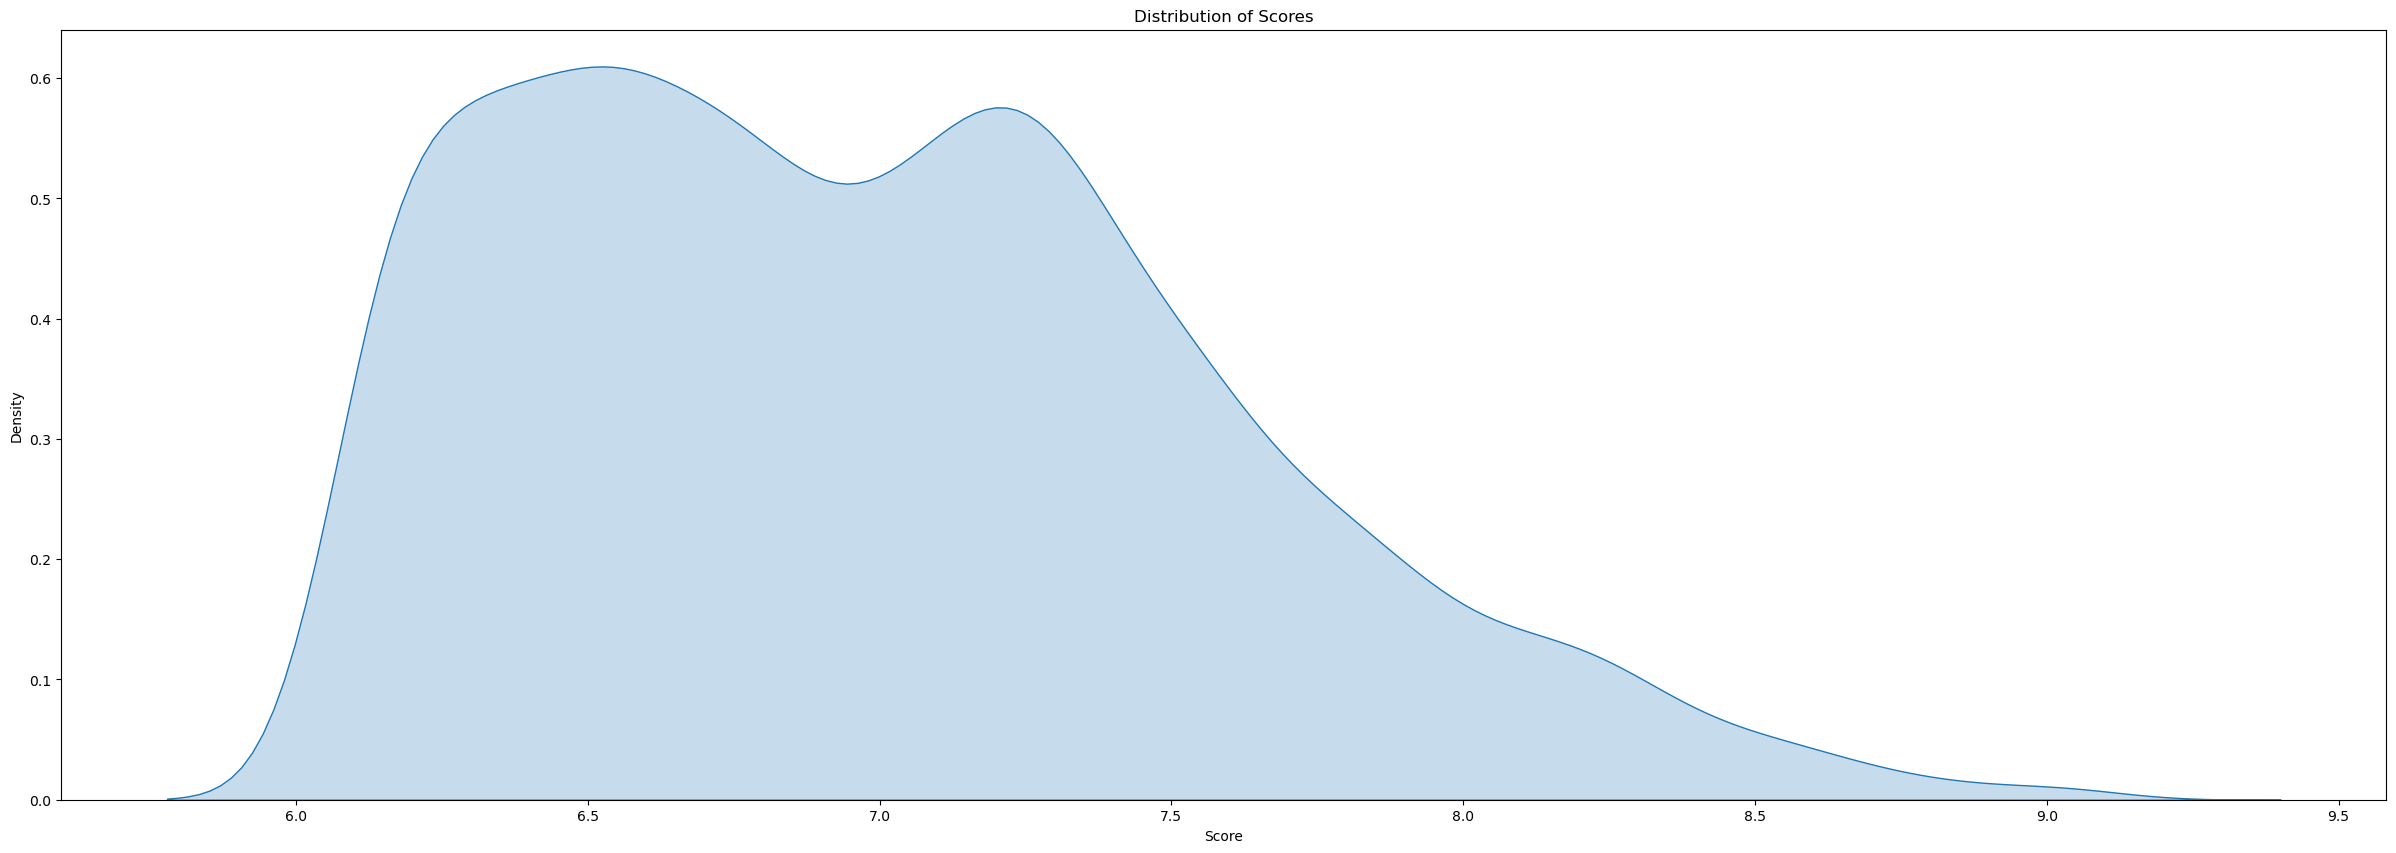

In [88]:
import seaborn as sns

# Create a density plot of scores
sns.kdeplot(eda_df['Score'], shade=True)
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Scores')
plt.show()

In [89]:
eda_df.columns


Index(['Name', 'ID', 'Name_Length', 'Episodes', 'Rank', 'Score', 'Members',
       'Favorites', 'Score_user', 'Studio', 'Duration', 'Rating', 'Type',
       'Start Date', 'End Date', 'Status', 'Shounen', 'Drama', 'Ecchi',
       'Suspense', 'Comedy', 'Supernatural', 'Mystery', 'LovePolygon',
       'RomanticSubtext', 'Action', 'MartialArts', 'TimeTravel',
       'AwardWinning', 'other_genres', 'A-1 Pictures', 'Bones', 'J.C.Staff',
       'Madhouse', 'Pierrot', 'Production I.G', 'Studio Deen', 'Sunrise',
       'TMS Entertainment', 'Toei Animation', 'add some', 'other_studio',
       'Movie', 'ONA', 'OVA', 'Special', 'TV'],
      dtype='object')

<AxesSubplot:xlabel='Type'>

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Average Score')

Text(0.5, 1.0, 'Average Score by Type')

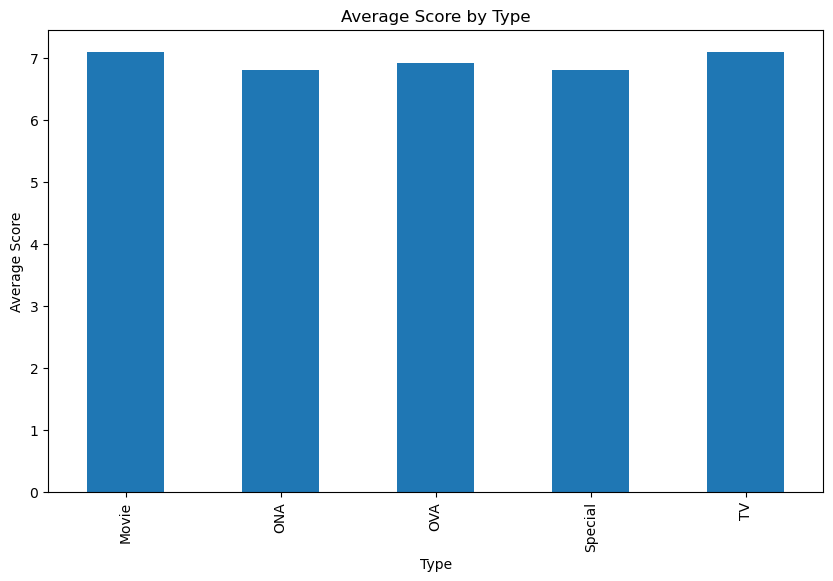

In [90]:

average_score_by_type = eda_df.groupby('Type')['Score'].mean()

# Plotting the average score by type
average_score_by_type.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Type')
plt.ylabel('Average Score')
plt.title('Average Score by Type')
plt.show()

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='Studio'>

Text(0.5, 0, 'Studio')

Text(0, 0.5, 'Average Score')

Text(0.5, 1.0, 'Average Score by Studio')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'A-1 Pictures'),
  Text(1, 0, 'Bones'),
  Text(2, 0, 'J.C.Staff'),
  Text(3, 0, 'Madhouse'),
  Text(4, 0, 'Pierrot'),
  Text(5, 0, 'Production I.G'),
  Text(6, 0, 'Studio Deen'),
  Text(7, 0, 'Sunrise'),
  Text(8, 0, 'TMS Entertainment'),
  Text(9, 0, 'Toei Animation')])

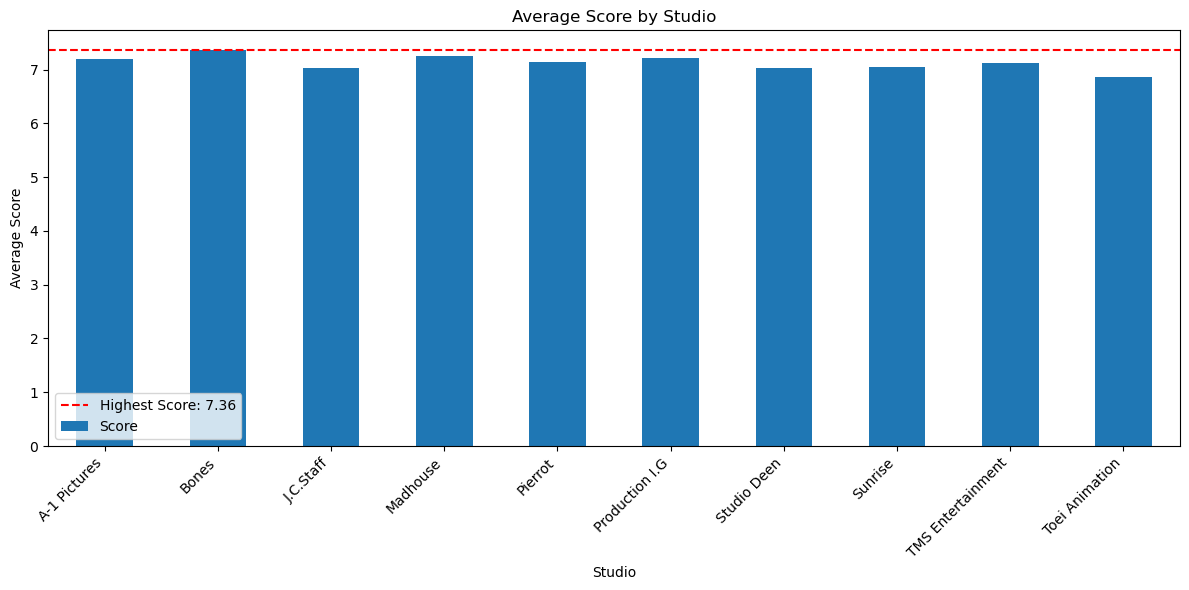

In [91]:
studio_columns = ['A-1 Pictures', 'Bones', 'J.C.Staff', 'Madhouse', 'Pierrot', 'Production I.G', 'Studio Deen', 'Sunrise', 'TMS Entertainment', 'Toei Animation']

average_score_by_studio = eda_df.groupby('Studio')['Score'].mean()

# Filter the average scores for the specified studios
average_score_selected_studios = average_score_by_studio.loc[studio_columns]

# Sort the average scores in descending order
average_score_sorted = average_score_selected_studios.sort_values(ascending=False)

# Plotting the average score by studio and highlighting the studio with the highest score
plt.figure(figsize=(12, 6))
average_score_selected_studios.plot(kind='bar')
plt.xlabel('Studio')
plt.ylabel('Average Score')
plt.title('Average Score by Studio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlighting the studio with the highest score
highest_score_studio = average_score_sorted.idxmax()
highest_score = average_score_sorted.max()
plt.axhline(y=highest_score, color='red', linestyle='--', label=f'Highest Score: {highest_score:.2f}')
plt.legend()

plt.show()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Average Score by Genre')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Average Score')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Shounen'),
  Text(4, 0, 'Supernatural'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Ecchi'),
  Text(7, 0, 'Suspense'),
  Text(8, 0, 'LovePolygon'),
  Text(9, 0, 'RomanticSubtext')])

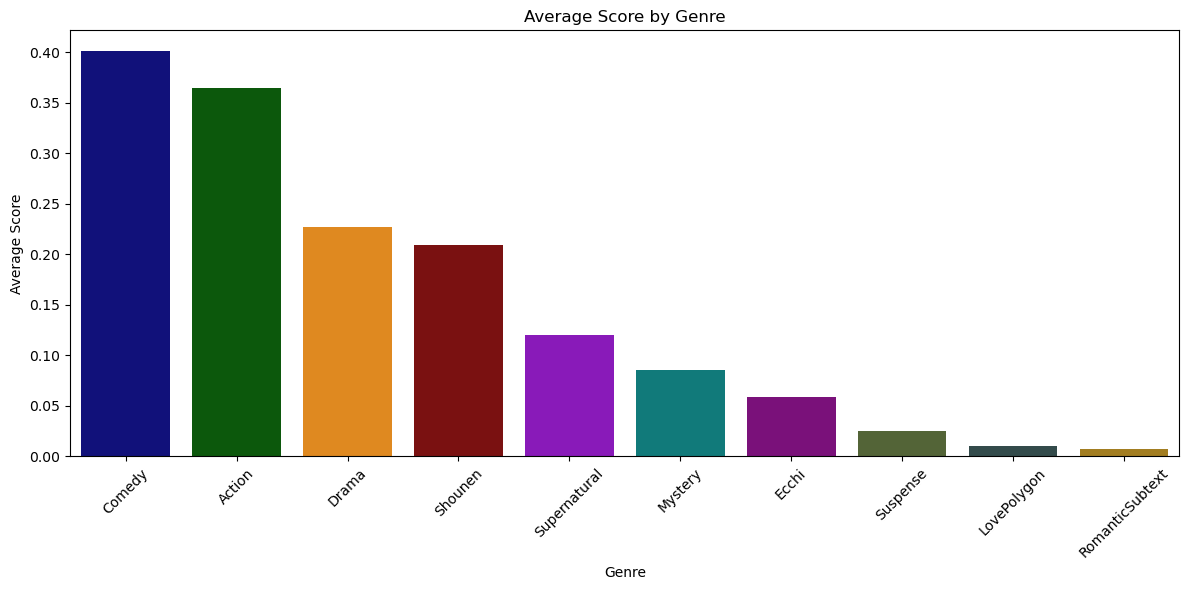

In [92]:
# Calculate the average score by genre
genre_avg_score = eda_df.iloc[:, 15:26].mean()

# Sort the average scores in descending order
genre_avg_score_sorted = genre_avg_score.sort_values(ascending=False)

# Define colors for the bars
colors = ['darkblue', 'darkgreen', 'darkorange', 'darkred', 'darkviolet', 'darkcyan', 'darkmagenta', 'darkolivegreen', 'darkslategray', 'darkgoldenrod']

# Plotting the average score by genre
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=genre_avg_score_sorted.index, y=genre_avg_score_sorted.values, palette=colors)
plt.title('Average Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:xlabel='Year'>

Text(0.5, 1.0, 'Average Score by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Score')

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

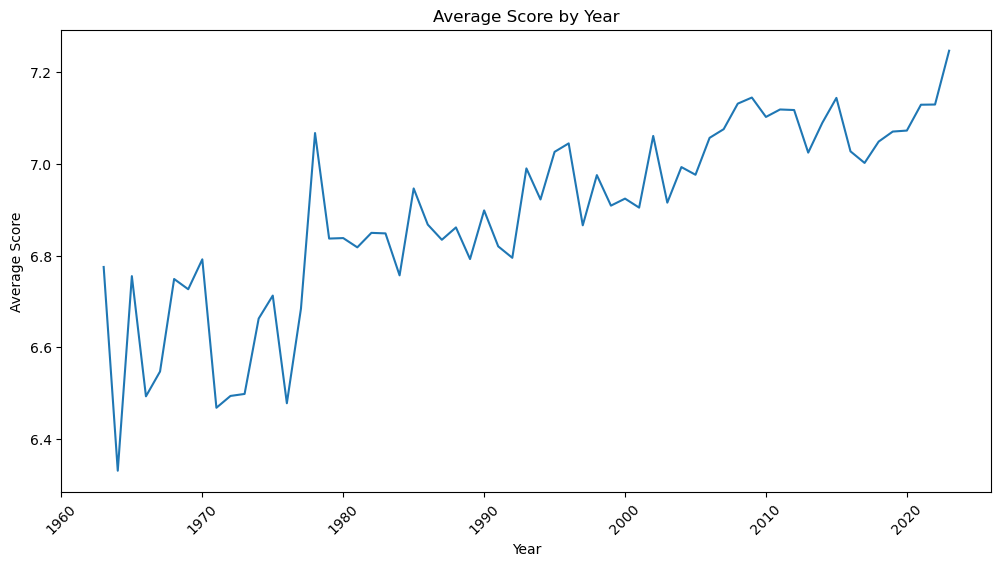

In [93]:
# Extract the year from the Start Date column
eda_df['Year'] = pd.to_datetime(eda_df['Start Date']).dt.year

# Calculate the average score by year
score_avg_by_year = eda_df.groupby('Year').mean()['Score']

# Plotting the average score by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=score_avg_by_year.index, y=score_avg_by_year.values)
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix')

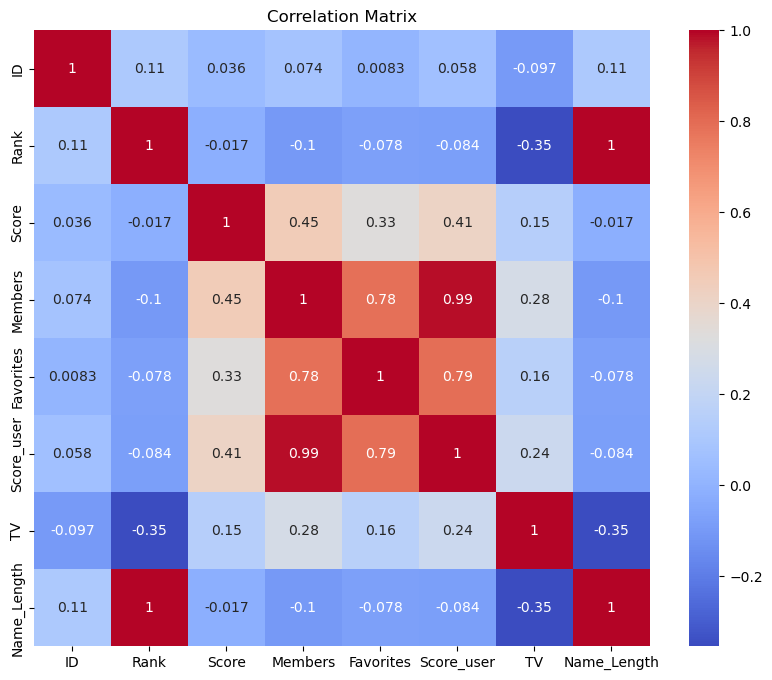

In [94]:
# Calculate the correlation matrx
correlation_matrix = eda_df[['ID', 'Rank', 'Score', 'Members', 'Favorites', 'Score_user','TV','Name_Length']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [95]:
eda_df['Type']

0            TV
1            TV
2            TV
3            TV
4            TV
         ...   
8482         TV
8483         TV
8484    Special
8485        ONA
8486         TV
Name: Type, Length: 8177, dtype: object

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Frequency of Genres')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Drama'),
  Text(3, 0, 'Shounen'),
  Text(4, 0, 'Supernatural'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Ecchi'),
  Text(7, 0, 'MartialArts'),
  Text(8, 0, 'Suspense'),
  Text(9, 0, 'TimeTravel'),
  Text(10, 0, 'LovePolygon'),
  Text(11, 0, 'RomanticSubtext')])

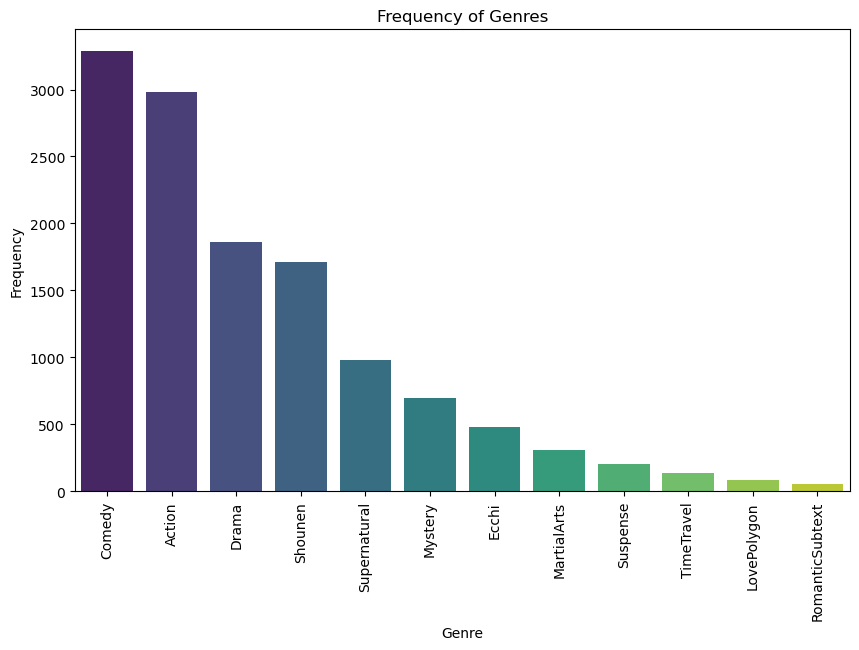

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the genre columns for analysis
genre_columns = ['Shounen', 'Drama', 'Ecchi', 'Suspense', 'Comedy', 'Supernatural', 'Mystery', 'LovePolygon',
                 'RomanticSubtext', 'Action', 'MartialArts', 'TimeTravel']

# Count the frequencies of each genre
genre_frequencies = eda_df[genre_columns].sum()

# Sort the genres by frequency in descending order
genre_frequencies = genre_frequencies.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_frequencies.index, y=genre_frequencies, palette='viridis')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()




<BarContainer object of 109 artists>

Text(0.5, 0, 'Name Length')

Text(0, 0.5, 'Average Score')

Text(0.5, 1.0, 'Average Score by Name Length')

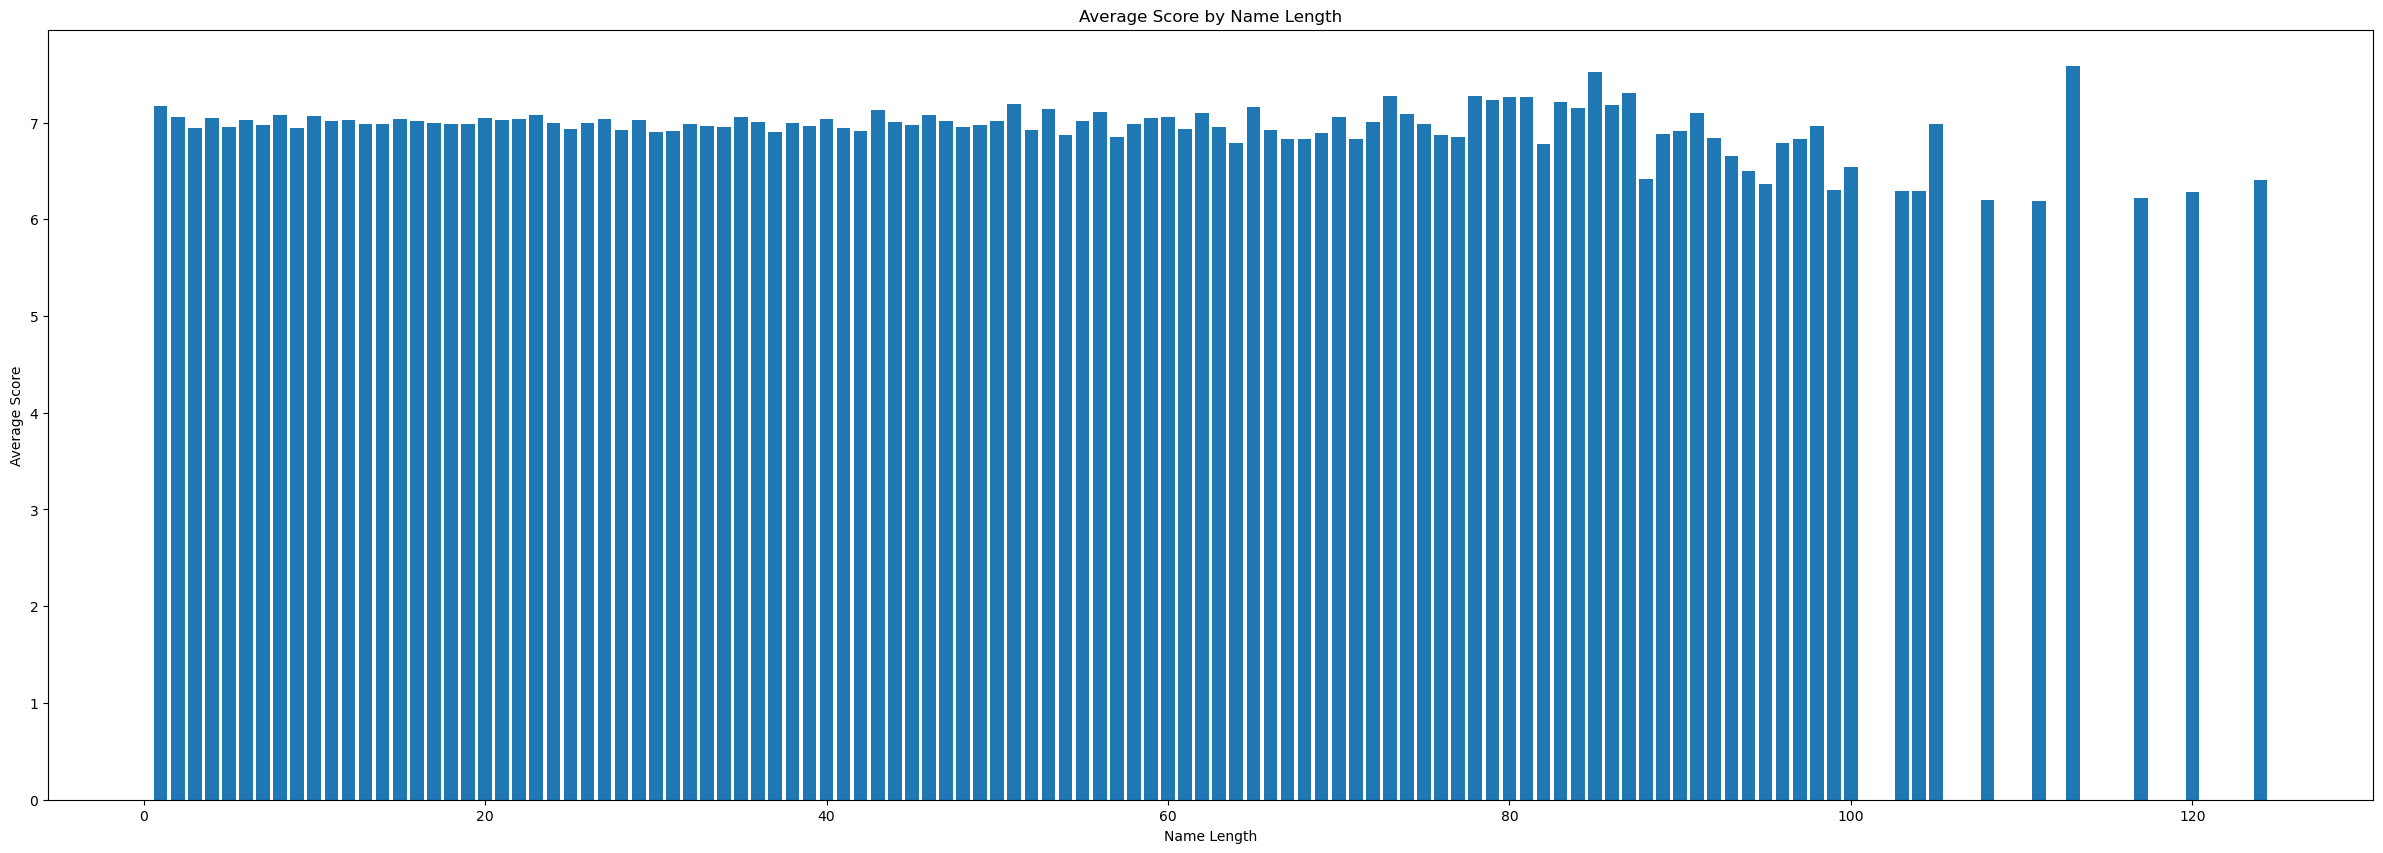

In [97]:
avg_score_by_length = data.groupby('Name_Length')['Score'].mean()

# Create a bar plot
plt.bar(avg_score_by_length.index, avg_score_by_length.values)
plt.xlabel('Name Length')
plt.ylabel('Average Score')
plt.title('Average Score by Name Length')
plt.show()

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='Score', ylabel='Members'>

Text(0.5, 1.0, 'Members vs Score')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Members')

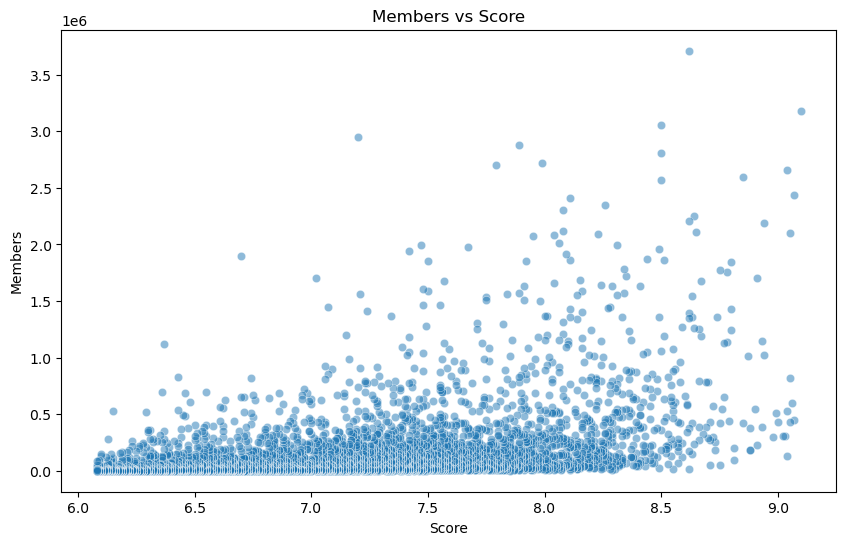

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='Score', ylabel='Favorites'>

Text(0.5, 1.0, 'Favorites vs Score')

Text(0.5, 0, 'Score')

Text(0, 0.5, 'Favorites')

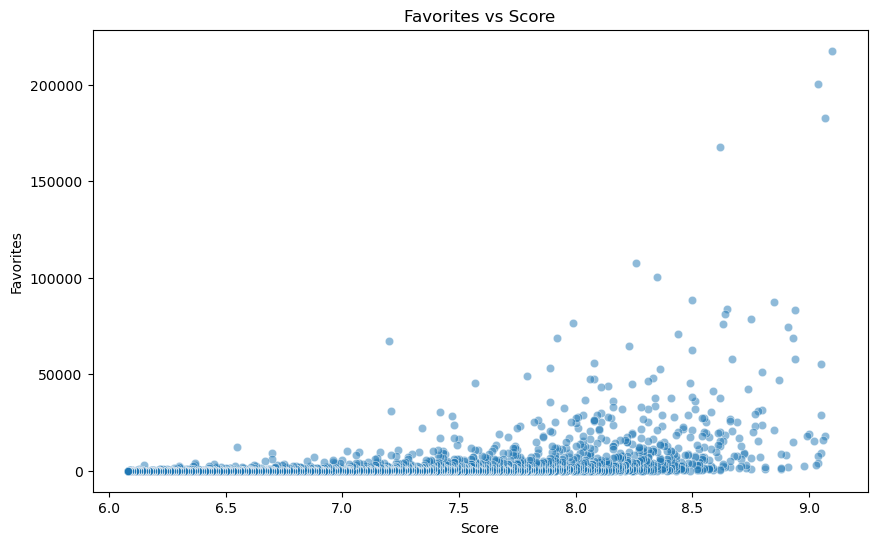

In [98]:
# Scatter plot: Members vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Members', data=eda_df, alpha=0.5)
plt.title('Members vs Score')
plt.xlabel('Score')
plt.ylabel('Members')
plt.show()

# Scatter plot: Favorites vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Favorites', data=eda_df, alpha=0.5)
plt.title('Favorites vs Score')
plt.xlabel('Score')
plt.ylabel('Favorites')
plt.show()

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='Studio'>

Text(0.5, 1.0, 'Average Score by Studio')

Text(0.5, 0, 'Studio')

Text(0, 0.5, 'Average Score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Bones'),
  Text(1, 0, 'Madhouse'),
  Text(2, 0, 'Production I.G'),
  Text(3, 0, 'A-1 Pictures'),
  Text(4, 0, 'Pierrot'),
  Text(5, 0, 'TMS Entertainment'),
  Text(6, 0, 'Sunrise'),
  Text(7, 0, 'J.C.Staff'),
  Text(8, 0, 'Studio Deen'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Toei Animation')])

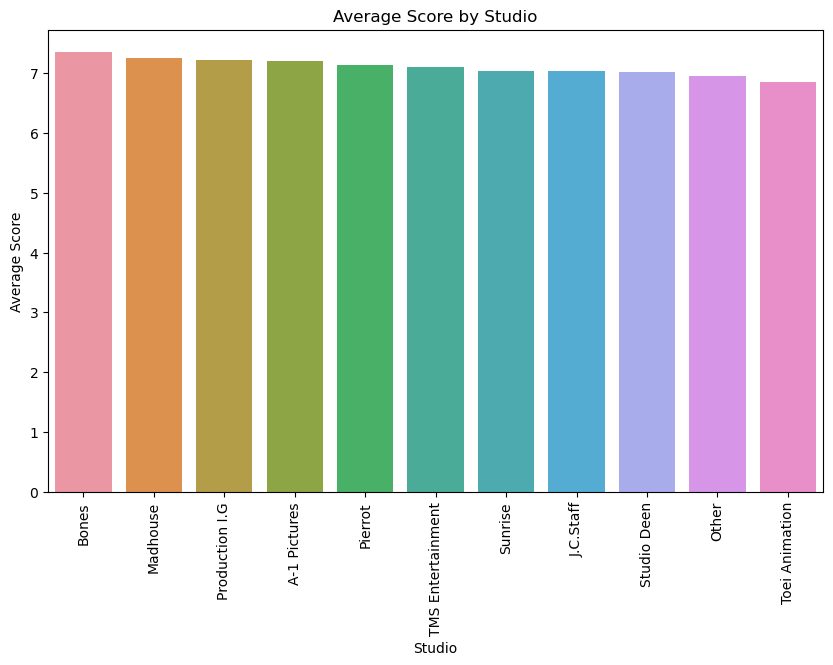

In [99]:
# Create a dictionary of main studios and their frequencies
freq_studios = {
    'A-1 Pictures': 214,
    'Bones': 157,
    'J.C.Staff': 284,
    'Madhouse': 304,
    'Pierrot': 192,
    'Production I.G': 268,
    'Studio Deen': 225,
    'Sunrise': 386,
    'TMS Entertainment': 228,
    'Toei Animation': 442,
    'Other': 231
}

# Filter the DataFrame for the main studios
main_studios = freq_studios.keys()
filtered_df = eda_df[eda_df['Studio'].isin(main_studios)]

# Group by studio and calculate the average score
average_scores = filtered_df.groupby('Studio')['Score'].mean()

# Add 'Other' category with the average score for other studios
average_scores['Other'] = eda_df[~eda_df['Studio'].isin(main_studios)]['Score'].mean()

# Sort the average scores in descending order
average_scores = average_scores.sort_values(ascending=False)

# Create a bar plot of the average scores
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores.index, y=average_scores.values)
plt.title('Average Score by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

In [100]:
eda_df.head()

,Name,ID,Name_Length,Episodes,Rank,Score,Members,Favorites,Score_user,Studio,...,TMS Entertainment,Toei Animation,add some,other_studio,Movie,ONA,OVA,Special,TV,Year
0,Fullmetal Alchemist: Brotherhood,5114.0,32,64.0,32,9.10,3175783,217573.0,2019566.0,Bones,...,0,0,0,0,0,0,0,0,1,2009.0
1,Bleach: Sennen Kessen-hen,41467.0,25,13.0,25,9.07,444548,17984.0,213506.0,Pierrot,...,0,0,0,0,0,0,0,0,1,2022.0
2,Steins;Gate,9253.0,11,24.0,11,9.07,2439813,182939.0,1335932.0,White Fox,...,0,0,0,1,0,0,0,0,1,2011.0
3,GintamaÂ°,28977.0,9,51.0,9,9.06,595373,15947.0,237924.0,Wit Studio,...,0,0,0,1,0,0,0,0,1,2015.0
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,43608.0,42,13.0,42,9.05,819904,29110.0,450963.0,MAPPA,...,0,0,0,1,0,0,0,0,1,2022.0


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Average Number of Members by Studio')

Text(0.5, 0, 'Studio')

Text(0, 0.5, 'Average Number of Members')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

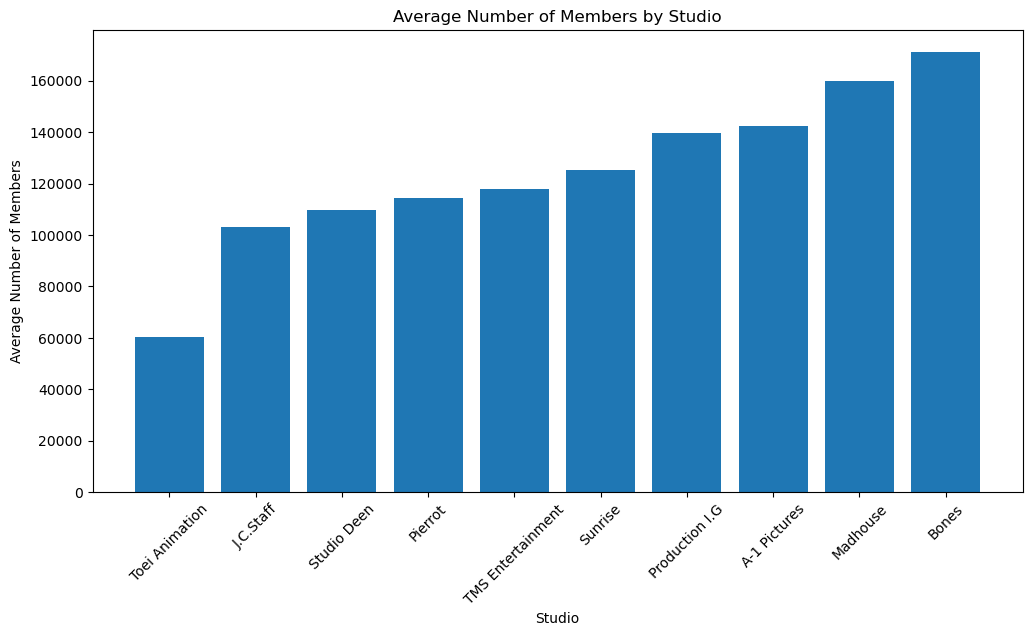

In [132]:
studio_avg_favorites = eda_df.groupby('Studio')['Members'].mean().reindex(freq_studios.keys())

# Sort the studios by average number of favorites
studio_avg_favorites = studio_avg_favorites.sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(studio_avg_favorites.index, studio_avg_favorites.values)
plt.title('Average Number of Members by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Number of Members')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 1.0, 'Average Number of Favorites by Studio')

Text(0.5, 0, 'Studio')

Text(0, 0.5, 'Average Number of Favorites')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

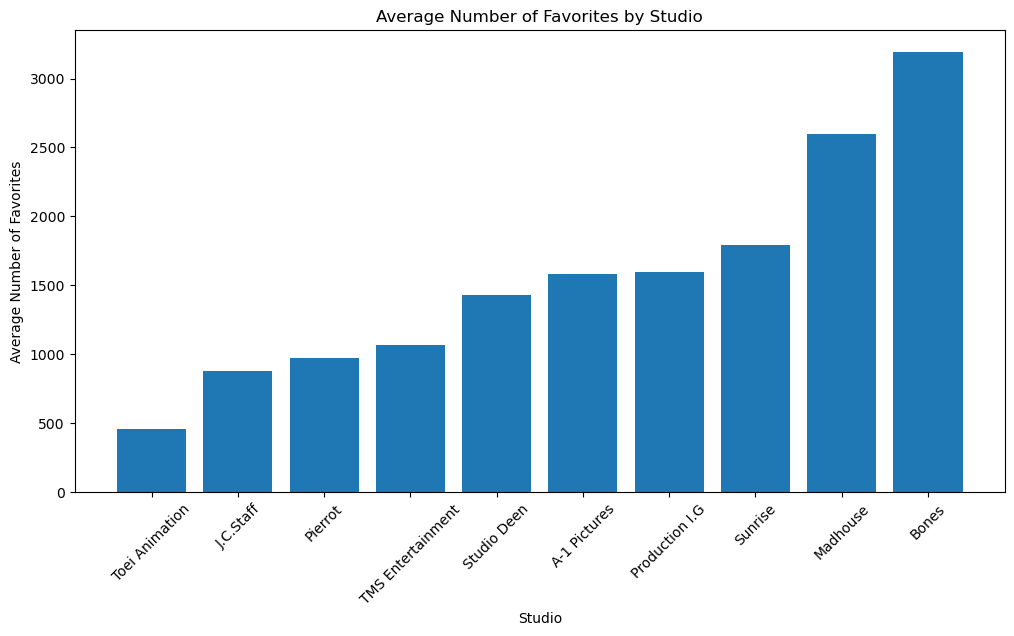

In [101]:
studio_avg_favorites = eda_df.groupby('Studio')['Favorites'].mean().reindex(freq_studios.keys())

# Sort the studios by average number of favorites
studio_avg_favorites = studio_avg_favorites.sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(studio_avg_favorites.index, studio_avg_favorites.values)
plt.title('Average Number of Favorites by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Number of Favorites')
plt.xticks(rotation=45)
plt.show()

In [102]:
eda_df.to_excel('eda_df.xlsx')

In [103]:
learning_df = pd.concat([eda_df], axis=1)

In [140]:
learning_df = pd.get_dummies(learning_df, columns=['Status'], prefix='Status', prefix_sep='')

learning_df

KeyError: "None of [Index(['Status'], dtype='object')] are in the [columns]"

In [143]:
learning_df = learning_df.dropna()


,ID,Name_Length,Episodes,Rank,Score,Members,Favorites,Score_user,Duration,Rating,...,add some,other_studio,Movie,ONA,OVA,Special,TV,Year,StatusCurrently Airing,StatusFinished Airing
0,5114.0,32,64.0,32,9.10,3175783,217573.0,2019566.0,1440,17.0,...,0,0,0,0,0,0,1,2009.0,0,1
1,41467.0,25,13.0,25,9.07,444548,17984.0,213506.0,1440,17.0,...,0,0,0,0,0,0,1,2022.0,0,1
2,9253.0,11,24.0,11,9.07,2439813,182939.0,1335932.0,1440,13.0,...,0,1,0,0,0,0,1,2011.0,0,1
3,28977.0,9,51.0,9,9.06,595373,15947.0,237924.0,1440,13.0,...,0,1,0,0,0,0,1,2015.0,0,1
4,43608.0,42,13.0,42,9.05,819904,29110.0,450963.0,1380,13.0,...,0,1,0,0,0,0,1,2022.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,42044.0,41,4.0,41,6.08,2205,2.0,902.0,60,13.0,...,0,1,0,1,0,0,0,2020.0,0,1
8479,33271.0,19,10.0,19,6.08,725,1.0,137.0,1380,13.0,...,0,1,0,1,0,0,0,2016.0,0,1
8482,9587.0,56,12.0,56,6.08,88734,92.0,40556.0,1380,13.0,...,0,1,0,0,0,0,1,2011.0,0,1
8483,3769.0,13,13.0,13,6.08,614,1.0,121.0,1440,0.0,...,1,0,0,0,0,0,1,2006.0,0,1


In [144]:
del learning_df['Studio']
del learning_df['Type']
del learning_df['Name']


KeyError: 'Studio'

In [145]:
learning_df.to_csv('learning_df3.csv', index=False)

In [108]:
learning_df

,ID,Name_Length,Episodes,Rank,Score,Members,Favorites,Score_user,Duration,Rating,...,add some,other_studio,Movie,ONA,OVA,Special,TV,Year,StatusCurrently Airing,StatusFinished Airing
0,5114.0,32,64.0,32,9.10,3175783,217573.0,2019566.0,1440,17.0,...,0,0,0,0,0,0,1,2009.0,0,1
1,41467.0,25,13.0,25,9.07,444548,17984.0,213506.0,1440,17.0,...,0,0,0,0,0,0,1,2022.0,0,1
2,9253.0,11,24.0,11,9.07,2439813,182939.0,1335932.0,1440,13.0,...,0,1,0,0,0,0,1,2011.0,0,1
3,28977.0,9,51.0,9,9.06,595373,15947.0,237924.0,1440,13.0,...,0,1,0,0,0,0,1,2015.0,0,1
4,43608.0,42,13.0,42,9.05,819904,29110.0,450963.0,1380,13.0,...,0,1,0,0,0,0,1,2022.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,42044.0,41,4.0,41,6.08,2205,2.0,902.0,60,13.0,...,0,1,0,1,0,0,0,2020.0,0,1
8479,33271.0,19,10.0,19,6.08,725,1.0,137.0,1380,13.0,...,0,1,0,1,0,0,0,2016.0,0,1
8482,9587.0,56,12.0,56,6.08,88734,92.0,40556.0,1380,13.0,...,0,1,0,0,0,0,1,2011.0,0,1
8483,3769.0,13,13.0,13,6.08,614,1.0,121.0,1440,0.0,...,1,0,0,0,0,0,1,2006.0,0,1


In [135]:
del eda_df['Name']
del eda_df['Studio']
del eda_df['Type']



In [136]:
print(eda_df.isnull().sum())

ID                      0
Name_Length             0
Episodes                0
Rank                    0
Score                   0
Members                 0
Favorites               0
Score_user              0
Duration                0
Rating                  0
Start Date           3115
End Date             3136
Status                  0
Shounen                 0
Drama                   0
Ecchi                   0
Suspense                0
Comedy                  0
Supernatural            0
Mystery                 0
LovePolygon             0
RomanticSubtext         0
Action                  0
MartialArts             0
TimeTravel              0
AwardWinning            0
other_genres            0
A-1 Pictures            0
Bones                   0
J.C.Staff               0
Madhouse                0
Pierrot                 0
Production I.G          0
Studio Deen             0
Sunrise                 0
TMS Entertainment       0
Toei Animation          0
add some                0
other_studio

In [137]:
eda_df.fillna(0)

,ID,Name_Length,Episodes,Rank,Score,Members,Favorites,Score_user,Duration,Rating,...,TMS Entertainment,Toei Animation,add some,other_studio,Movie,ONA,OVA,Special,TV,Year
0,5114.0,32,64.0,32,9.10,3175783,217573.0,2019566.0,1440,17.0,...,0,0,0,0,0,0,0,0,1,2009.0
1,41467.0,25,13.0,25,9.07,444548,17984.0,213506.0,1440,17.0,...,0,0,0,0,0,0,0,0,1,2022.0
2,9253.0,11,24.0,11,9.07,2439813,182939.0,1335932.0,1440,13.0,...,0,0,0,1,0,0,0,0,1,2011.0
3,28977.0,9,51.0,9,9.06,595373,15947.0,237924.0,1440,13.0,...,0,0,0,1,0,0,0,0,1,2015.0
4,43608.0,42,13.0,42,9.05,819904,29110.0,450963.0,1380,13.0,...,0,0,0,1,0,0,0,0,1,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,9587.0,56,12.0,56,6.08,88734,92.0,40556.0,1380,13.0,...,0,0,0,1,0,0,0,0,1,2011.0
8483,3769.0,13,13.0,13,6.08,614,1.0,121.0,1440,0.0,...,0,0,1,0,0,0,0,0,1,2006.0
8484,14663.0,55,1.0,55,6.08,14473,8.0,6315.0,180,0.0,...,0,0,0,1,0,0,0,1,0,0.0
8485,51438.0,9,1.0,9,6.08,278,0.0,124.0,60,13.0,...,0,0,0,0,0,1,0,0,0,0.0


LinearRegression()

Linear Regression Performance:
MAE: 0.38103576225003394
RMSE: 0.47128853080384325
R2_Score: 0.41137185613430505


Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Linear Regression')

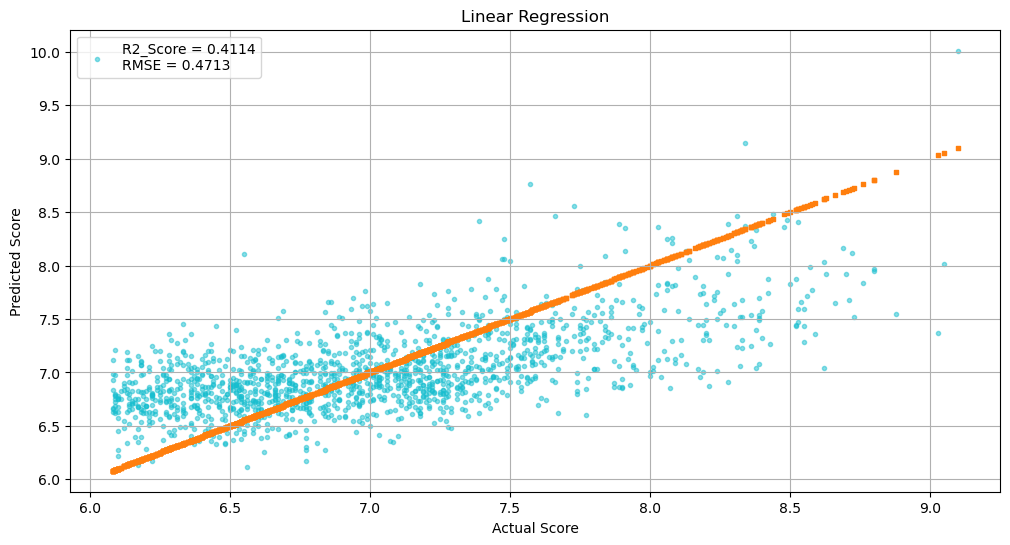

In [115]:
new_data = learning_df.copy()
X = new_data.drop(['Score', 'Rank','Name_Length','ID'], axis=1)
y = new_data['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_pred = lm.predict(X_test)

print('Linear Regression Performance:')
print('MAE:', mean_absolute_error(y_test, lm_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm_pred)))
print('R2_Score:', r2_score(y_test, lm_pred))

pred = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': lm_pred})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Score'], pred['Predicted_Score'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Score'], pred['Actual_Score'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend(['R2_Score = {:.4f}\nRMSE = {:.4f}'.format(
    r2_score(y_test, lm_pred),
    np.sqrt(mean_squared_error(y_test, lm_pred)))
], loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [150]:
eda_df = eda_df.fillna(0)

In [151]:
print(eda_df.isnull().sum())

ID                        0
Name_Length               0
Episodes                  0
Rank                      0
Score                     0
Members                   0
Favorites                 0
Score_user                0
Duration                  0
Rating                    0
Start Date                0
End Date                  0
Shounen                   0
Drama                     0
Ecchi                     0
Suspense                  0
Comedy                    0
Supernatural              0
Mystery                   0
LovePolygon               0
RomanticSubtext           0
Action                    0
MartialArts               0
TimeTravel                0
AwardWinning              0
other_genres              0
A-1 Pictures              0
Bones                     0
J.C.Staff                 0
Madhouse                  0
Pierrot                   0
Production I.G            0
Studio Deen               0
Sunrise                   0
TMS Entertainment         0
Toei Animation      

RandomForestRegressor(min_samples_split=5, n_estimators=500, random_state=101)

Random Forest Performance:
MAE: 0.274295887688922
RMSE: 0.3545797152574489
R2_Score: 0.6689981816040204


Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Random Forest')

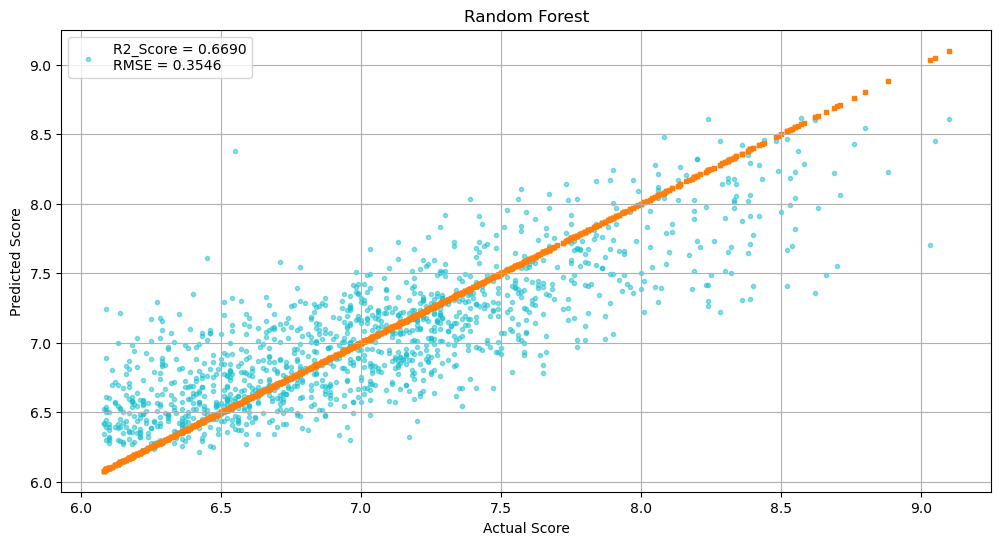

In [153]:

new_data = learning_df.copy()
X = new_data.drop(['Score'], axis=1)
y = new_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

rf = RandomForestRegressor(min_samples_split=5, n_estimators=500, random_state=101)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print('Random Forest Performance:')
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2_Score:', r2_score(y_test, rf_pred))

pred = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': rf_pred})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Score'], pred['Predicted_Score'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Score'], pred['Actual_Score'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend(['R2_Score = {:.4f}\nRMSE = {:.4f}'.format(
    r2_score(y_test, rf_pred),
    np.sqrt(mean_squared_error(y_test, rf_pred)))
], loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101),
             param_grid={'max_depth': [None, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 300, 500]})

RandomForestRegressor(min_samples_split=5, n_estimators=500, random_state=101)

Random Forest Performance (with Hyperparameter Tuning):
MAE: 0.274295887688922
RMSE: 0.3545797152574489
R2_Score: 0.6689981816040204


Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'Random Forest (with Hyperparameter Tuning)')

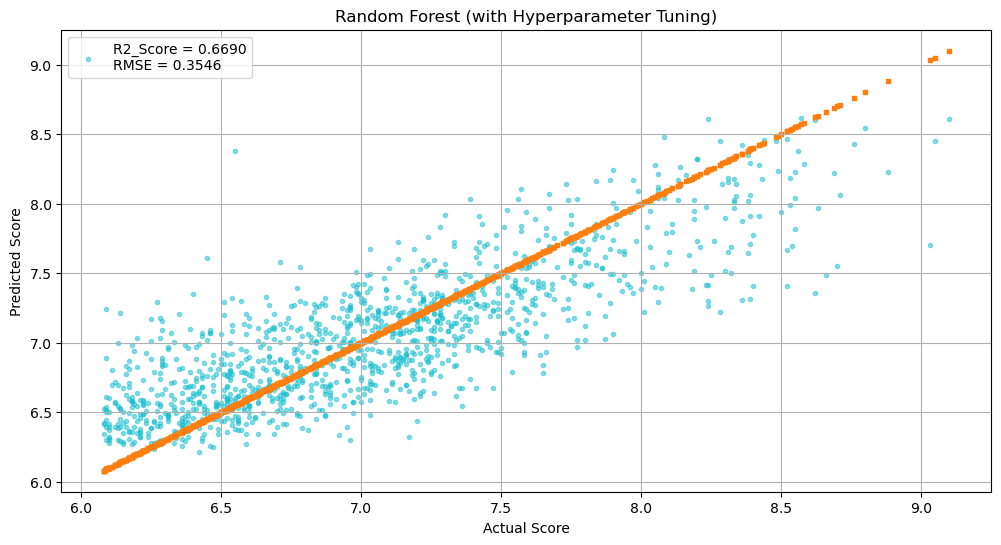

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}


In [172]:

X = new_data.drop(['Score'], axis=1)
y = new_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None,2, 5, 10,15],
    'min_samples_split': [2, 5, 10,15]
}

# Create the random forest model
rf = RandomForestRegressor(random_state=101)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_rf.fit(X_train, y_train)

# Predict using the best model
best_rf_pred = best_rf.predict(X_test)

# Evaluate the performance
print('Random Forest Performance (with Hyperparameter Tuning):')
print('MAE:', mean_absolute_error(y_test, best_rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, best_rf_pred)))
print('R2_Score:', r2_score(y_test, best_rf_pred))

# Plot the predictions
pred = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': best_rf_pred})
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Score'], pred['Predicted_Score'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Score'], pred['Actual_Score'], s=10, color='tab:orange', marker="s", label='Actual')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend(['R2_Score = {:.4f}\nRMSE = {:.4f}'.format(
    r2_score(y_test, best_rf_pred),
    np.sqrt(mean_squared_error(y_test, best_rf_pred)))
], loc='best')
plt.title('Random Forest (with Hyperparameter Tuning)')
plt.grid()
plt.show()

print('Best Hyperparameters:', best_params)

KNeighborsRegressor(n_neighbors=100)

KNN Regression Performance:
MAE: 0.3778342857142857
RMSE: 0.47582925997756126
R2_Score: 0.40391952753515326


Text(0.5, 0, 'Actual Score')

Text(0, 0.5, 'Predicted Score')

Text(0.5, 1.0, 'KNN Regression')

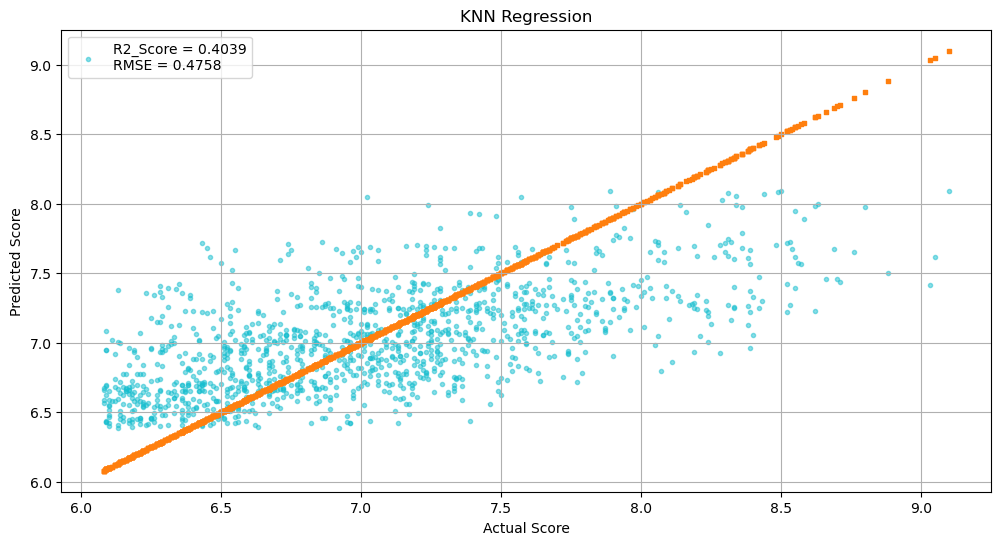

In [130]:

X = new_data.drop(['Score'], axis=1)
y = new_data['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print('KNN Regression Performance:')
print('MAE:', mean_absolute_error(y_test, knn_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, knn_pred)))
print('R2_Score:', r2_score(y_test, knn_pred))

pred = pd.DataFrame({'Actual_Score': y_test, 'Predicted_Score': knn_pred})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Score'], pred['Predicted_Score'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Score'], pred['Actual_Score'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.legend(['R2_Score = {:.4f}\nRMSE = {:.4f}'.format(
    r2_score(y_test, knn_pred),
    np.sqrt(mean_squared_error(y_test, knn_pred)))
], loc='best')
plt.title('KNN Regression')
plt.grid()
plt.show()
